<a href="https://colab.research.google.com/github/lakshithagnk/CNN-image-classification/blob/main/Assignment_03_MINIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 CNN for image classification

1. Set up your environment: Ensure that you have installed all the required software packages.


In [6]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.optimizers import Adam

2. Prepare your dataset: Choose a data set from UCI Machine Learning Repository that is appropriate for classification. Download the selected dataset.

3. Split the dataset into training, validation, and testing subsets using a ratio of 60% for training and 20% each for validation and testing sets.

In [7]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Normalize and reshape the input data
images = images / 255.0
images = images.reshape(-1, 28, 28, 1)  # Add the channel dimension

# Split the dataset into training, validation, and testing sets
train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)
print("Testing set shape:", test_images.shape, test_labels.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (42000, 28, 28, 1) (42000,)
Validation set shape: (14000, 28, 28, 1) (14000,)
Testing set shape: (14000, 28, 28, 1) (14000,)


4. Build the CNN model: A common CNN design consists of interleaving convolutional and max-pooling layers, ending with a linear classification layer

In [3]:
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    # layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    # layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    # layers.Dense(64, activation='relu'),
    # layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

7. Train the model: Train the model using the training data for 20 epochs and plot
training and validation loss for with respect to epoch. Here, for the optimizer
you may use adam and sparse categorical crossentropy as the loss function. Set
a suitable learning rate.

In [4]:
learning_rate = 0.0005
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

Epoch 1/20
42/42 [==============================] - 38s 878ms/step - loss: 1.6412 - accuracy: 0.4622 - val_loss: 0.5809 - val_accuracy: 0.8442
Epoch 2/20
42/42 [==============================] - 35s 827ms/step - loss: 0.5351 - accuracy: 0.8320 - val_loss: 0.2525 - val_accuracy: 0.9254
Epoch 3/20
42/42 [==============================] - 34s 802ms/step - loss: 0.2973 - accuracy: 0.9123 - val_loss: 0.1672 - val_accuracy: 0.9476
Epoch 4/20
42/42 [==============================] - 32s 768ms/step - loss: 0.2320 - accuracy: 0.9315 - val_loss: 0.1291 - val_accuracy: 0.9630
Epoch 5/20
42/42 [==============================] - 33s 790ms/step - loss: 0.1775 - accuracy: 0.9479 - val_loss: 0.1219 - val_accuracy: 0.9614
Epoch 6/20
42/42 [==============================] - 32s 776ms/step - loss: 0.1656 - accuracy: 0.9516 - val_loss: 0.1007 - val_accuracy: 0.9706
Epoch 7/20
42/42 [==============================] - 33s 793ms/step - loss: 0.1390 - accuracy: 0.9585 - val_loss: 0.0883 - val_accuracy: 0.9729

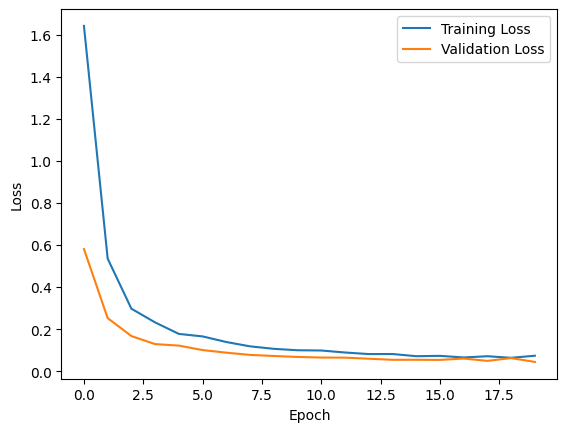

In [6]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

10. Evaluate the Model: After training, evaluate the model’s performance on the testing
dataset. Record the train/test accuracy, confusion matrix, precision and recall.

438/438 [==============================] - 2s 5ms/step - loss: 0.0564 - accuracy: 0.9825
Test accuracy: 0.9825000166893005
438/438 [==============================] - 3s 6ms/step


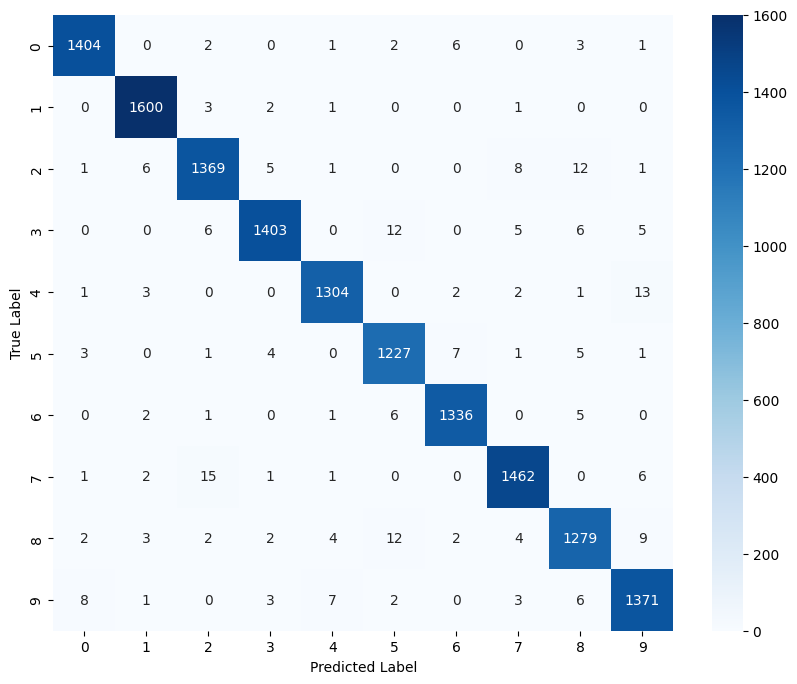

In [7]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Predict the classes for test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [8]:
# precision and recall
report = classification_report(test_labels, predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1419
           1       0.99      1.00      0.99      1607
           2       0.98      0.98      0.98      1403
           3       0.99      0.98      0.98      1437
           4       0.99      0.98      0.99      1326
           5       0.97      0.98      0.98      1249
           6       0.99      0.99      0.99      1351
           7       0.98      0.98      0.98      1488
           8       0.97      0.97      0.97      1319
           9       0.97      0.98      0.98      1401

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [9]:
# precision and recall
precision = precision_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.9825
Recall: 0.9825


11. Plot training and validation loss for with respect to epoch for different learning rates
such as 0.0001, 0.001, 0.01, and 0.1. Comment on your results and select a learning
rate with a justification.

**learning_rate = 0.0001**

Epoch 1/20
42/42 [==============================] - 35s 802ms/step - loss: 2.2120 - accuracy: 0.2165 - val_loss: 2.0694 - val_accuracy: 0.4481
Epoch 2/20
42/42 [==============================] - 34s 805ms/step - loss: 1.8786 - accuracy: 0.4397 - val_loss: 1.5256 - val_accuracy: 0.7166
Epoch 3/20
42/42 [==============================] - 33s 781ms/step - loss: 1.3619 - accuracy: 0.5988 - val_loss: 0.9429 - val_accuracy: 0.7941
Epoch 4/20
42/42 [==============================] - 32s 768ms/step - loss: 0.9641 - accuracy: 0.7047 - val_loss: 0.6336 - val_accuracy: 0.8515
Epoch 5/20
42/42 [==============================] - 35s 829ms/step - loss: 0.7371 - accuracy: 0.7765 - val_loss: 0.4773 - val_accuracy: 0.8813
Epoch 6/20
42/42 [==============================] - 33s 773ms/step - loss: 0.5987 - accuracy: 0.8190 - val_loss: 0.3871 - val_accuracy: 0.8990
Epoch 7/20
42/42 [==============================] - 33s 776ms/step - loss: 0.5132 - accuracy: 0.8470 - val_loss: 0.3320 - val_accuracy: 0.9104

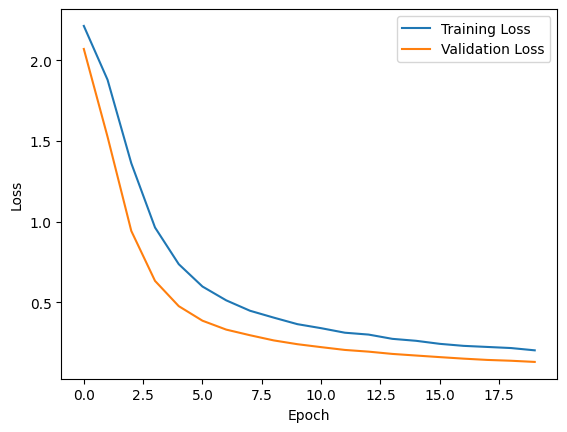

In [10]:
model1 = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.0001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model1.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

# Plotting training and validation loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**learning_rate = 0.001**

Epoch 1/20
42/42 [==============================] - 36s 822ms/step - loss: 1.2603 - accuracy: 0.5996 - val_loss: 0.3283 - val_accuracy: 0.9046
Epoch 2/20
42/42 [==============================] - 33s 798ms/step - loss: 0.3220 - accuracy: 0.9036 - val_loss: 0.1613 - val_accuracy: 0.9521
Epoch 3/20
42/42 [==============================] - 33s 785ms/step - loss: 0.1961 - accuracy: 0.9421 - val_loss: 0.1080 - val_accuracy: 0.9661
Epoch 4/20
42/42 [==============================] - 32s 771ms/step - loss: 0.1407 - accuracy: 0.9574 - val_loss: 0.0913 - val_accuracy: 0.9715
Epoch 5/20
42/42 [==============================] - 33s 778ms/step - loss: 0.1223 - accuracy: 0.9624 - val_loss: 0.0873 - val_accuracy: 0.9723
Epoch 6/20
42/42 [==============================] - 33s 776ms/step - loss: 0.1071 - accuracy: 0.9676 - val_loss: 0.0711 - val_accuracy: 0.9786
Epoch 7/20
42/42 [==============================] - 33s 781ms/step - loss: 0.0921 - accuracy: 0.9718 - val_loss: 0.0631 - val_accuracy: 0.9799

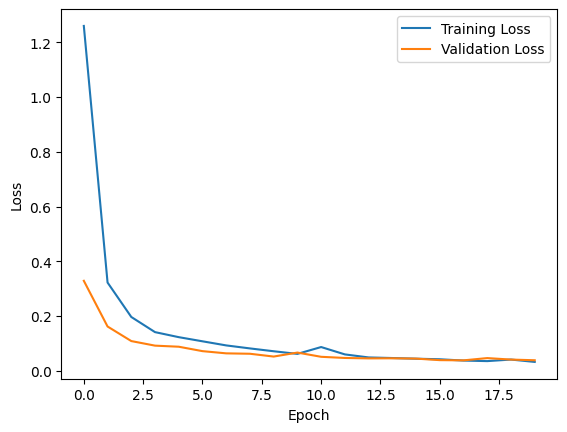

In [11]:
model2 = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

# Plotting training and validation loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**learning_rate = 0.01**

Epoch 1/20
42/42 [==============================] - 36s 834ms/step - loss: 0.6612 - accuracy: 0.7848 - val_loss: 0.1236 - val_accuracy: 0.9616
Epoch 2/20
42/42 [==============================] - 33s 788ms/step - loss: 0.1095 - accuracy: 0.9681 - val_loss: 0.0800 - val_accuracy: 0.9779
Epoch 3/20
42/42 [==============================] - 32s 773ms/step - loss: 0.0728 - accuracy: 0.9797 - val_loss: 0.0562 - val_accuracy: 0.9833
Epoch 4/20
42/42 [==============================] - 32s 766ms/step - loss: 0.0492 - accuracy: 0.9853 - val_loss: 0.0430 - val_accuracy: 0.9867
Epoch 5/20
42/42 [==============================] - 32s 776ms/step - loss: 0.0412 - accuracy: 0.9883 - val_loss: 0.0541 - val_accuracy: 0.9841
Epoch 6/20
42/42 [==============================] - 33s 780ms/step - loss: 0.0499 - accuracy: 0.9850 - val_loss: 0.0458 - val_accuracy: 0.9865
Epoch 7/20
42/42 [==============================] - 32s 771ms/step - loss: 0.0320 - accuracy: 0.9908 - val_loss: 0.0421 - val_accuracy: 0.9884

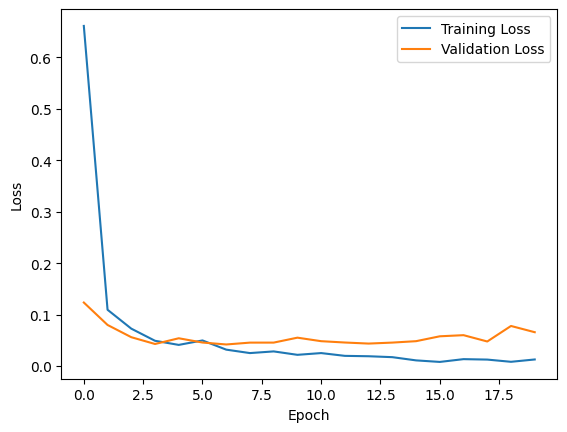

In [12]:
model3 = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model3.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

# Plotting training and validation loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

438/438 [==============================] - 2s 5ms/step - loss: 0.0564 - accuracy: 0.9825
Test accuracy: 0.9825000166893005
438/438 [==============================] - 2s 5ms/step


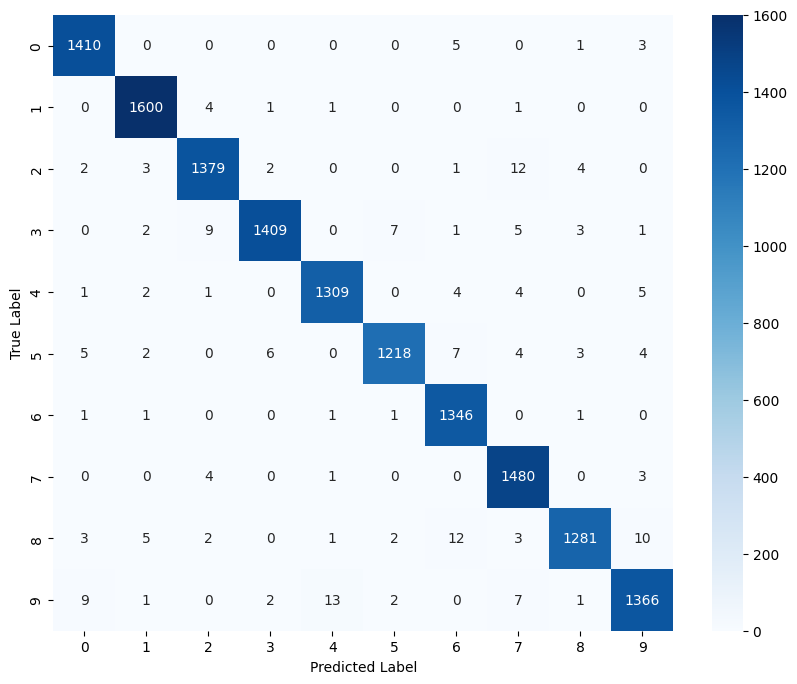

In [13]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Predict the classes for test images
predictions = model3.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**learning_rate = 0.1**

In [ ]:
model4 = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.1
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model4.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history4 = model4.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

# Plotting training and validation loss
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2 Compare your network with state-of-the-art networks

12. Choose two state-of-the-art pre-trained model
13. Load the pre-trained model and fine-tune it for the your dataset


In [9]:
# Adjust MNIST images to RGB for pretrained models
train_images_rgb = np.repeat(train_images, 3, axis = -1)
val_images_rgb = np.repeat(val_images, 3, axis = -1)
test_images_rgb = np.repeat(test_images, 3, axis = -1)

# Resize images to 32x32
train_images_rgb = tf.image.resize(train_images_rgb, [32, 32])
val_images_rgb = tf.image.resize(val_images_rgb, [32, 32])
test_images_rgb = tf.image.resize(test_images_rgb, [32, 32])

# Function to build and fine-tune a model
def build_fine_tune_model(base_model, input_shape, trainable = False):
    # Freeze the base model layers
    base_model.trainable = trainable

    # Build the model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation = 'relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation = 'softmax')
    ])
    return model


# Load pretrained ResNet50
resnet_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
resnet_model = build_fine_tune_model(resnet_base, input_shape = (32, 32, 3))

# Compile the ResNet model
resnet_model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


# Load pretrained VGG16
vgg_base = VGG16(weights='imagenet', include_top = False, input_shape = (32, 32, 3))
vgg_model = build_fine_tune_model(vgg_base, input_shape = (32, 32, 3))

# Compile the VGG model
vgg_model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


14. Train the fine-tuned model using the same training and testing data split as your custom CNN model
15. Record training and validation loss values for each epoch

In [10]:
# Train ResNet50
history_resnet = resnet_model.fit(train_images_rgb, train_labels, validation_data = (val_images_rgb, val_labels), epochs = 10, batch_size = 1024)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 247s 6s/step - accuracy: 0.2219 - loss: 2.4080 - val_accuracy: 0.5729 - val_loss: 1.4933
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 259s 6s/step - accuracy: 0.5065 - loss: 1.4972 - val_accuracy: 0.7159 - val_loss: 1.1480
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 231s 5s/step - accuracy: 0.6119 - loss: 1.2276 - val_accuracy: 0.7616 - val_loss: 0.9517
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.6796 - loss: 1.0450 - val_accuracy: 0.7883 - val_loss: 0.8111
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 293s 6s/step - accuracy: 0.7137 - loss: 0.9327 - val_accuracy: 0.8091 - val_loss: 0.7232
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 262s 6s/step - accuracy: 0.7387 - loss: 0.8536 - val_accuracy: 0.8271 - val_loss: 0.6569
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 229s 5s/step - accuracy: 0.7568 - loss: 0.7979 - val_accuracy: 0.8447 - val_loss: 0.5873
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.7821 - loss: 0.7205 - val_accuracy: 0.8524 - v

In [ ]:
# Train VGG16
history_vgg = vgg_model.fit(train_images_rgb, train_labels, validation_data = (val_images_rgb, val_labels), epochs = 10, batch_size = 1024)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 803s 19s/step - accuracy: 0.2168 - loss: 2.2265 - val_accuracy: 0.6931 - val_loss: 1.3549
Epoch 2/10
12/42 ━━━━━━━━━━━━━━━━━━━━ 6:28 13s/step - accuracy: 0.5752 - loss: 1.4109

16. Evaluate the fine-tuned model on the testing dataset and calculate the test accuracy

In [ ]:
# Evaluate and Compare Both Models
resnet_test_loss, resnet_test_accuracy = resnet_model.evaluate(test_images_rgb, test_labels)
vgg_test_loss, vgg_test_accuracy = vgg_model.evaluate(test_images_rgb, test_labels)

print(f"ResNet50 Test Accuracy: {resnet_test_accuracy:.4f}")
print(f"VGG16 Test Accuracy: {vgg_test_accuracy:.4f}")



In [ ]:
# Plot Training and Validation Loss for ResNet
plt.plot(history_resnet.history['loss'], label = 'ResNet Training Loss')
plt.plot(history_resnet.history['val_loss'], label = 'ResNet Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50 Loss")
plt.show()



In [ ]:
# Plot Training and Validation Loss for VGG16
plt.plot(history_vgg.history['loss'], label = 'VGG Training Loss')
plt.plot(history_vgg.history['val_loss'], label = 'VGG Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("VGG16 Loss")
plt.show()

In [ ]:
# Predict and Generate Confusion Matrices
def plot_confusion_matrix(model, test_images, test_labels, model_name):
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis = 1)
    conf_matrix = confusion_matrix(test_labels, predicted_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    print(f"Classification Report for {model_name}:")
    print(classification_report(test_labels, predicted_classes, target_names=[str(i) for i in range(10)]))



In [ ]:
# ResNet Confusion Matrix and Report
plot_confusion_matrix(resnet_model, test_images_rgb, test_labels, "ResNet50")

In [ ]:
# VGG Confusion Matrix and Report
plot_confusion_matrix(vgg_model, test_images_rgb, test_labels, "VGG16")